# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv
load_dotenv()


True

In [4]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stevencherryii/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key ='c5c492da6d534f529f2d9c386c8f500f'


In [6]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [8]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
Bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    
)
# Print total articles
print(f"Total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")

# Show sample article
Bitcoin_headlines["articles"][3]

Total articles about Bitcoin: 3669


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Alexis Akwagyiram, Tom Wilson',
 'title': 'How bitcoin met the real world in Africa - Reuters India',
 'description': 'Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street market in Lagos: He started paying his suppliers in bitcoin.',
 'url': 'https://in.reuters.com/article/crypto-currencies-africa-insight-idINKBN25Z0TZ',
 'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20200908&t=2&i=1532554925&r=LYNXMPEG870GM&w=800',
 'publishedAt': '2020-09-08T06:34:00Z',
 'content': 'LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street market in Lagos: He started paying his suppliers in bitco… [+7646 chars]'}

In [9]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
Ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    
)
# Print total articles
print(f"Total articles about Ethereum: {Ethereum_headlines['totalResults']}")

# Show sample article
Ethereum_headlines["articles"][3]

Total articles about Ethereum: 1387


{'source': {'id': None, 'name': 'ReadWrite'},
 'author': 'Nate Nead',
 'title': 'How to Make Your Own Crytocurrency',
 'description': 'Bitcoin, Ethereum, Litecoin, and a handful of other cryptocurrencies have broken into the mainstream, but what if you want to start a cryptocurrency of your own? There are many valid motivations for doing so. For example, you may not like how the mainstream c…',
 'url': 'https://readwrite.com/2020/09/01/how-to-make-your-own-crytocurrency/',
 'urlToImage': 'https://images.readwrite.com/wp-content/uploads/2020/09/make-your-own-crytopcurrency.jpg',
 'publishedAt': '2020-09-01T19:42:11Z',
 'content': None}

In [11]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()



,date,text,compound,positive,negative,neutral
0,2020-09-10,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.16,0.840
1,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.00,1.000
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.00,0.937
3,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000
4,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000


In [12]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()



,date,text,compound,positive,negative,neutral
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791
1,2020-09-07,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000
2,2020-09-18,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,0.0,1.000
3,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.0,0.819
4,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.0,1.000


In [13]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
Bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.371550,0.076050,0.008000,0.915950
std,0.320603,0.046397,0.035777,0.046388
min,-0.690800,0.000000,0.000000,0.802000
25%,0.448550,0.083250,0.000000,0.910000
50%,0.507000,0.090000,0.000000,0.910000
75%,0.507000,0.090000,0.000000,0.910000
max,0.750600,0.198000,0.160000,1.000000


In [14]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,16.000000,16.000000,16.000000,16.000000
mean,0.190694,0.063062,0.015688,0.921312
std,0.298172,0.070121,0.034763,0.085886
min,-0.267700,0.000000,0.000000,0.747000
25%,0.000000,0.000000,0.000000,0.871000
50%,0.000000,0.053500,0.000000,0.931000
75%,0.401900,0.097250,0.000000,1.000000
max,0.757900,0.209000,0.110000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: The highest mean positive score came from Boitcoin.

Q: Which coin had the highest compound score?

A: The highest compound score also came from Bitcoin.

Q. Which coin had the highest positive score?

A: The highest positive score came from Bitcoin.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()

In [13]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [17]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens
    


In [19]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
Bitcoin_df["tokens"] = Bitcoin_df.text.apply(tokenizer)
Bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-09-10,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.16,0.840,"[two, alleged, crypto, trader, singapore, appa..."
1,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.00,1.000,"[alexis, akwagyiram, tom, wilson, monthly, cry..."
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.00,0.937,"[covid, pandemic, ha, resulted, mass, shift, w..."
3,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000,"[lagoslondon, reuters, four, month, ago, abola..."
4,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000,"[lagoslondon, reuters, four, month, ago, abola..."


In [22]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791,"[youve, interacted, cryptocurrencies, past, co..."
1,2020-09-07,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000,"[tldr, complete, stock, cryptocurrency, invest..."
2,2020-09-18,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,0.0,1.000,"[september, min, readopinions, expressed, entr..."
3,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.0,0.819,"[london, reuters, sound, like, surefire, bet, ..."
4,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.0,1.000,"[new, york, reuters, brooklynbased, technology..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [36]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N=2
bitcoin = tokenizer(Bitcoin_df.text.str.cat())
counts = Counter(ngrams(bitcoin, N))
print(dict(counts))

{('two', 'alleged'): 1, ('alleged', 'crypto'): 1, ('crypto', 'trader'): 1, ('trader', 'singapore'): 1, ('singapore', 'apparently'): 1, ('apparently', 'came'): 1, ('came', 'foolproof'): 1, ('foolproof', 'plan'): 1, ('plan', 'rather'): 1, ('rather', 'convert'): 1, ('convert', 'customer'): 1, ('customer', 'singapore'): 1, ('singapore', 'dollar'): 1, ('dollar', 'bitcoin'): 1, ('bitcoin', 'would'): 1, ('would', 'simply'): 1, ('simply', 'rob'): 1, ('rob', 'victim'): 1, ('victim', 'came'): 1, ('came', 'charsby'): 1, ('charsby', 'alexis'): 1, ('alexis', 'akwagyiram'): 1, ('akwagyiram', 'tom'): 1, ('tom', 'wilson'): 1, ('wilson', 'monthly'): 1, ('monthly', 'crypto'): 1, ('crypto', 'transfer'): 1, ('transfer', 'africa'): 1, ('africa', 'rise'): 1, ('rise', 'year'): 1, ('year', 'much'): 1, ('much', 'activity'): 1, ('activity', 'nigeria'): 1, ('nigeria', 'south'): 1, ('south', 'africa'): 1, ('africa', 'kenya'): 1, ('kenya', 'driven'): 1, ('driven', 'small'): 1, ('small', 'business'): 1, ('business'

In [37]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N= 2
ethereum= tokenizer(ethereum_df.text.str.cat())
counts_e = Counter(ngrams(ethereum, N))
print(dict(counts_e))

{('youve', 'interacted'): 1, ('interacted', 'cryptocurrencies'): 1, ('cryptocurrencies', 'past'): 1, ('past', 'couple'): 1, ('couple', 'year'): 1, ('year', 'good'): 1, ('good', 'chance'): 1, ('chance', 'youve'): 1, ('youve', 'used'): 1, ('used', 'metamask'): 1, ('metamask', 'cryptocurrency'): 1, ('cryptocurrency', 'wallet'): 1, ('wallet', 'form'): 1, ('form', 'browser'): 1, ('browser', 'extension'): 1, ('extension', 'support'): 1, ('support', 'ether'): 1, ('ether', 'charstldr'): 1, ('charstldr', 'complete'): 1, ('complete', 'stock'): 1, ('stock', 'cryptocurrency'): 1, ('cryptocurrency', 'investment'): 1, ('investment', 'toolkit'): 1, ('toolkit', 'bundle'): 1, ('bundle', 'sale'): 1, ('sale', 'sept'): 1, ('sept', 'saving'): 1, ('saving', 'list'): 1, ('list', 'pricethe'): 1, ('pricethe', 'world'): 1, ('world', 'finance'): 1, ('finance', 'ha'): 1, ('ha', 'always'): 1, ('always', 'complicated'): 1, ('complicated', 'th'): 1, ('th', 'charsseptember'): 1, ('charsseptember', 'min'): 2, ('min', 

In [38]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [39]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_10= token_count(bitcoin, 10)
bitcoin_10

[('bitcoin', 43),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('charsour', 14),
 ('robot', 14),
 ('colleague', 14),
 ('writes', 14),
 ('every', 14),
 ('fucking', 14),
 ('daywelcome', 14)]

In [40]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_10= token_count(ethereum,10)
ethereum_10

[('bitcoin', 8),
 ('cryptocurrency', 6),
 ('ethereum', 5),
 ('ha', 4),
 ('used', 3),
 ('price', 3),
 ('decentralized', 3),
 ('exchange', 3),
 ('getty', 3),
 ('youve', 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

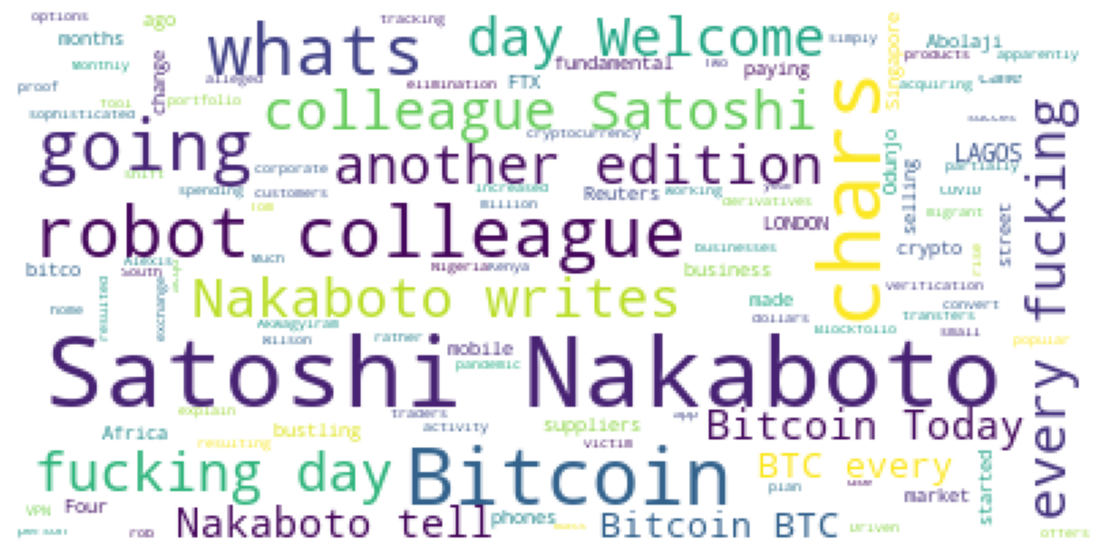

In [52]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

cloud = WordCloud(background_color='white').generate(Bitcoin_df.text.str.cat())
cloud
plt.axis("off")
plt.imshow(cloud)

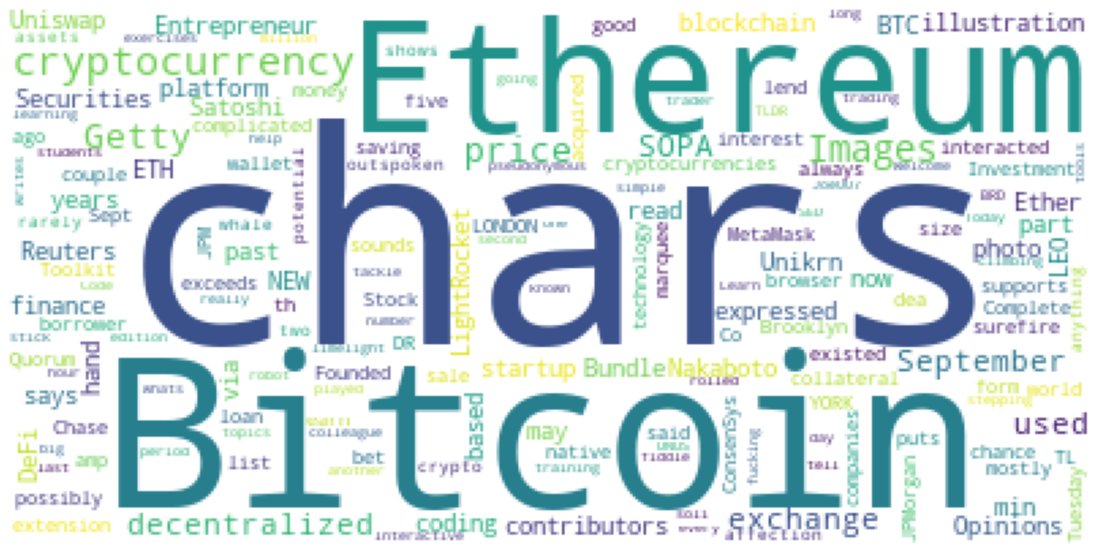

In [54]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
cloud_e = WordCloud(background_color='white').generate(ethereum_df.text.str.cat())
cloud_e
plt.axis("off")
plt.imshow(cloud_e)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [55]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [56]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [57]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
concat_bitcoin = Bitcoin_df.text.str.cat()
concat_bitcoin

'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]By Alexis Akwagyiram, Tom Wilson\r\n* Monthly crypto transfers to and from Africa rise 55% in a year\r\n* Much of the activity in Nigeria, South Africa and Kenya\r\n* Driven by small businesses and migrant… [+7730 chars]“The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-person verification, which can partially explain the succes… [+3548 chars]LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street market in Lagos: He started paying his suppliers in bitco… [+7646 chars]LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling st

In [65]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_pro = nlp(concat_bitcoin)


# Add a title to the document
# YOUR CODE HERE!
bitcoin_pro.user_data["Title"] = "Bitcoin NER"


In [64]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_pro, style='ent')

In [66]:
# List all Entities
# YOUR CODE HERE!
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

Two CARDINAL
Singapore GPE
365,000 Singapore dollars MONEY
bitcoin GPE
Alexis Akwagyiram PERSON
Tom Wilson PERSON
Monthly DATE
Africa LOC
55% PERCENT
a year DATE
Nigeria GPE
South Africa GPE
Kenya GPE
VPN PRODUCT
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Blockfolio GPE
FTX ORG
$150 million MONEY
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
To

---

## Ethereum NER

In [67]:
# Concatenate all of the bitcoin text together
concat_ethereum = ethereum_df.text.str.cat()
concat_ethereum

"If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.\r\nThe world of finance has always been complicated, and now th… [+2225 chars]September\r\n18, 2020\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nFounded over five years ago, the Ethereum platform and its native ether (ETH)\xa0have existed mostly in t… [+6239 chars]LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars]NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee blockchain

In [68]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethereum_pro = nlp(concat_ethereum)

ethereum_pro.user_data["Title"] = "Ethereum NER"


In [69]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_pro, style = 'ent')

In [71]:
# List all Entities
# YOUR CODE HERE!
for i in ethereum_pro.ents:
    print(i.text, i.label_)

the past couple of years DATE
The Complete Stock and Cryptocurrency Investment Toolkit Bundle ORG
29.46 MONEY
Sept. 7 DATE
97% PERCENT
18, 2020 DATE
6 min QUANTITY
five years ago DATE
Ethereum ORG
ETH ORG
Reuters ORG
about 20% PERCENT
YORK PERSON
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
chars]$100 million MONEY
Deloitte ORG
KPMG ORG
Fidelity ORG
$100 milli MONEY
Uniswap ORG
400 CARDINAL
UNI ORG
September 1 DATE
twenty dollars MONEY
May DATE
bitcoin GPE
DeFi LOC
DeFi LOC
Ethereum ORG
Mateusz Slodkowski/ PERSON
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
chars]The Securities and Exchange Commission ORG
Unikrn ORG
Unikrn ORG
UnikoinGold ORG
16, 2020 DATE
6 min QUANTITY
the past few months DATE
wo